In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DEU.csv")
df.columns

<ipython-input-12-029285cb71e2>:1: DtypeWarning: Columns (33,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DEU.csv")


Index(['id', 'date', 'confirmed', 'deaths', 'recovered', 'tests', 'vaccines',
       'people_vaccinated', 'people_fully_vaccinated', 'hosp', 'icu', 'vent',
       'school_closing', 'workplace_closing', 'cancel_events',
       'gatherings_restrictions', 'transport_closing',
       'stay_home_restrictions', 'internal_movement_restrictions',
       'international_movement_restrictions', 'information_campaigns',
       'testing_policy', 'contact_tracing', 'facial_coverings',
       'vaccination_policy', 'elderly_people_protection',
       'government_response_index', 'stringency_index',
       'containment_health_index', 'economic_support_index',
       'administrative_area_level', 'administrative_area_level_1',
       'administrative_area_level_2', 'administrative_area_level_3',
       'latitude', 'longitude', 'population', 'iso_alpha_3', 'iso_alpha_2',
       'iso_numeric', 'iso_currency', 'key_local', 'key_google_mobility',
       'key_apple_mobility', 'key_jhu_csse', 'key_nuts', 'key_g

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392172 entries, 0 to 392171
Data columns (total 47 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   id                                   392172 non-null  object 
 1   date                                 392172 non-null  object 
 2   confirmed                            372682 non-null  float64
 3   deaths                               372682 non-null  float64
 4   recovered                            372682 non-null  float64
 5   tests                                118 non-null     float64
 6   vaccines                             267713 non-null  float64
 7   people_vaccinated                    267713 non-null  float64
 8   people_fully_vaccinated              267713 non-null  float64
 9   hosp                                 0 non-null       float64
 10  icu                                  1083 non-null    float64
 11  vent         

In [14]:
print(df.describe())

          confirmed         deaths     recovered         tests      vaccines  \
count  3.726820e+05  372682.000000  3.726820e+05  1.180000e+02  2.677130e+05   
mean   1.017128e+05     761.471305  1.009242e+05  5.617668e+07  1.066145e+06   
std    1.072074e+06    6090.033754  1.066236e+06  4.022750e+07  8.361526e+06   
min    1.000000e+00       0.000000  0.000000e+00  1.292910e+05  5.000000e+00   
25%    2.869000e+03      73.000000  2.786250e+03  1.830283e+07  1.063350e+05   
50%    1.079500e+04     175.000000  1.056300e+04  5.621447e+07  2.345790e+05   
75%    4.565375e+04     324.000000  4.529575e+04  8.355604e+07  4.356150e+05   
max    3.822166e+07  168583.000000  3.778816e+07  1.312868e+08  1.921325e+08   

       people_vaccinated  people_fully_vaccinated  hosp          icu  vent  \
count       2.677130e+05             2.677130e+05   0.0  1083.000000   0.0   
mean        4.238929e+05             3.863532e+05   NaN  1893.245614   NaN   
std         3.197399e+06             3.016126

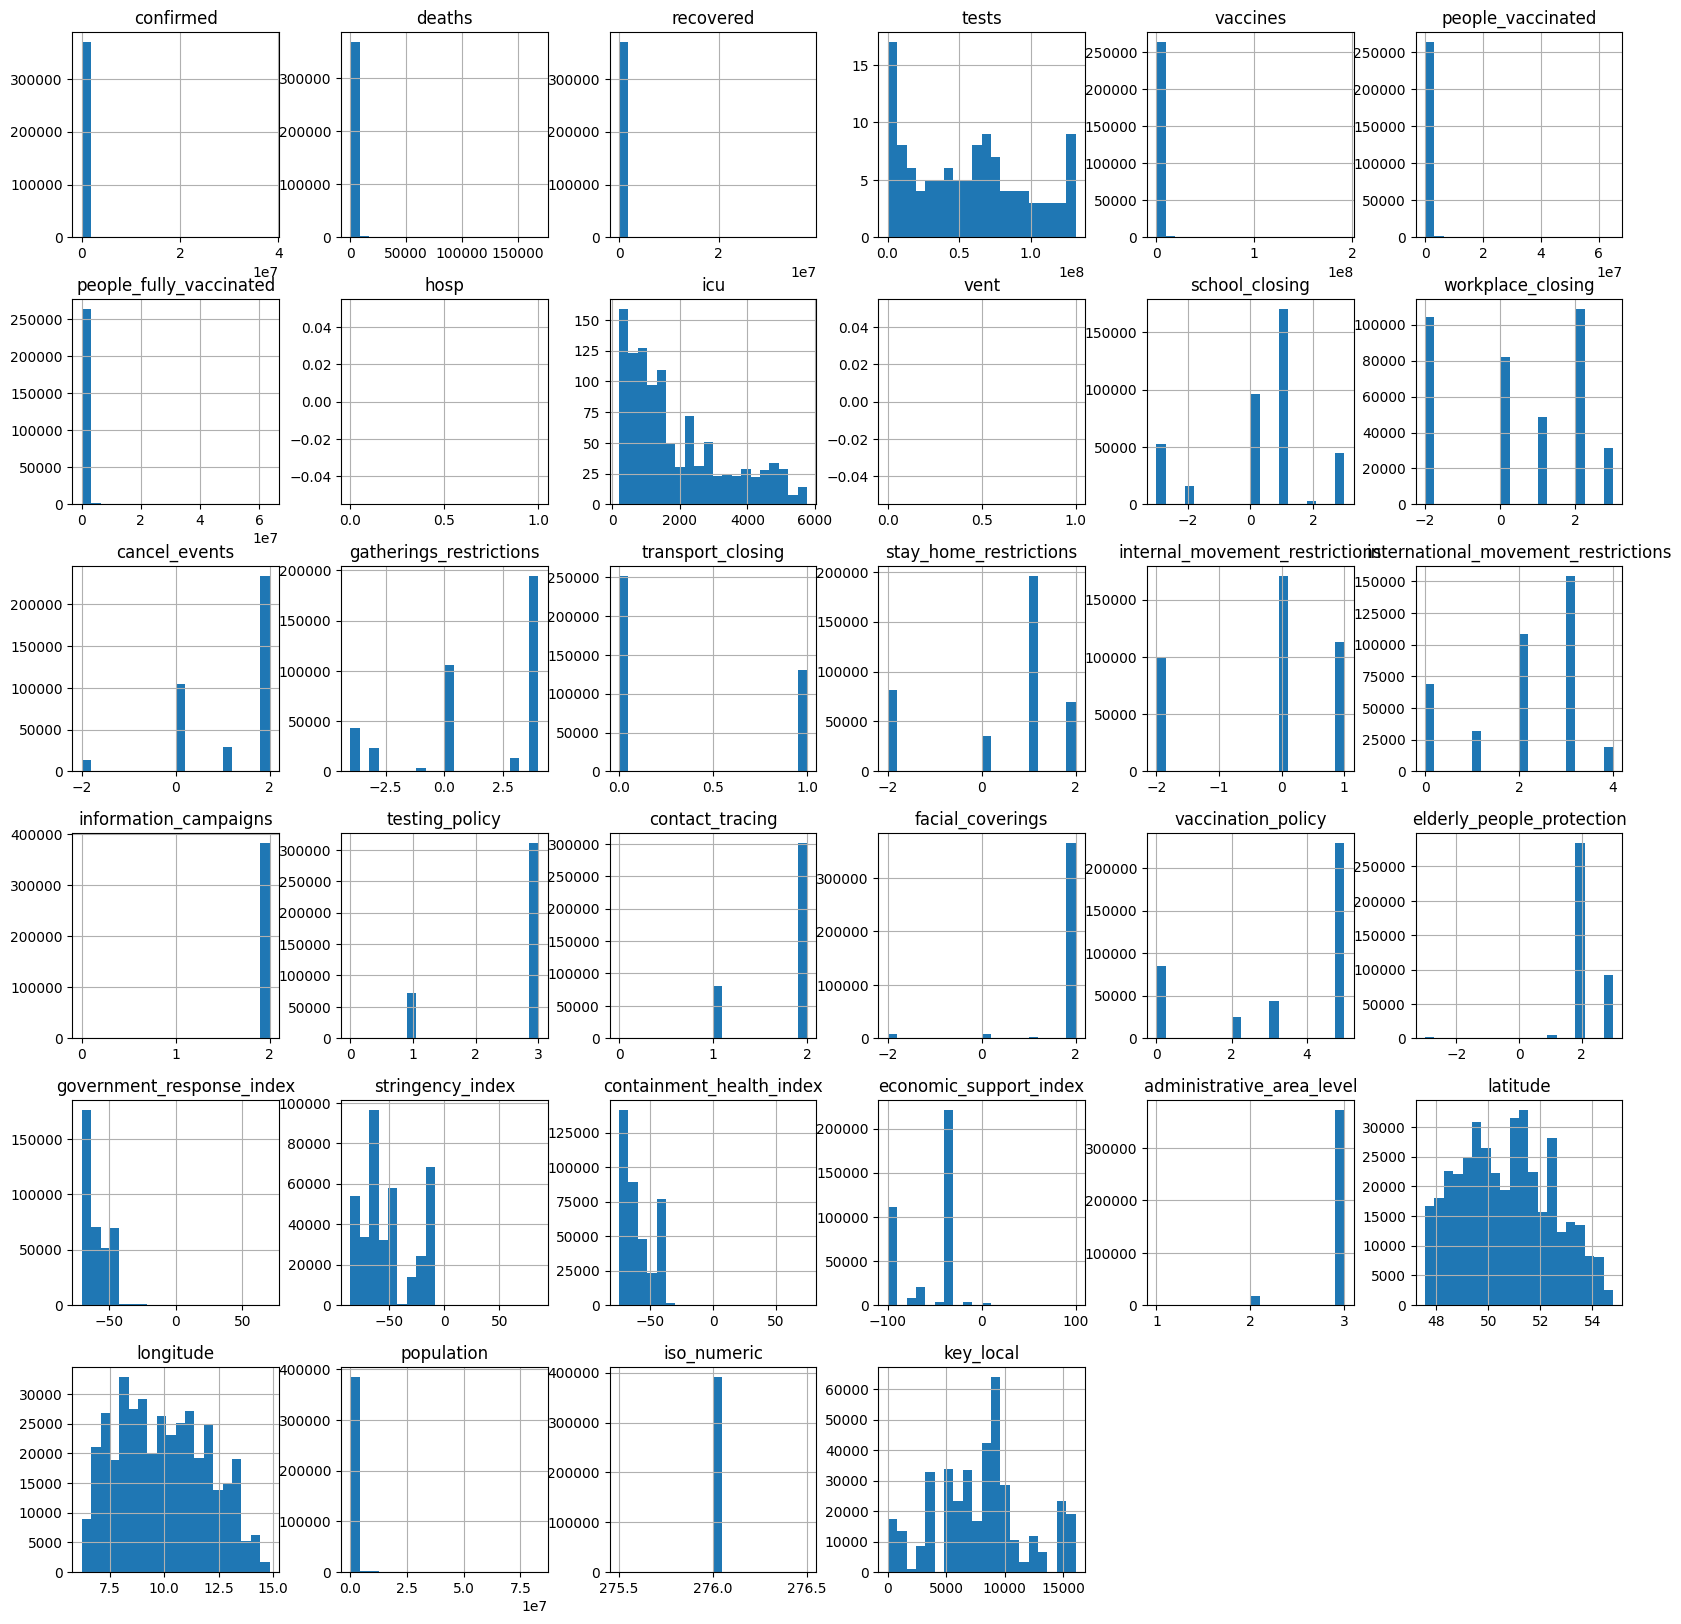

In [15]:
df.hist(bins=20, figsize=(20,20))
plt.show()

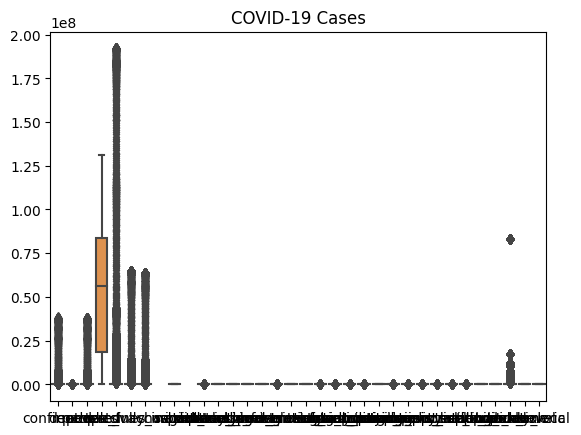

<Figure size 2500x1600 with 0 Axes>

In [45]:
sns.boxplot(data=df)
plt.title("COVID-19 Cases")
plt.figure(figsize=(25,16))
plt.show()

In [21]:
# Split the dataframe into smaller logical parts
df_cases = df[['id', 'date', 'confirmed', 'deaths', 'recovered']]
df_policy = df[['id', 'date', 'school_closing', 'workplace_closing', 'cancel_events', 'gatherings_restrictions', 'transport_closing', 'stay_home_restrictions', 'internal_movement_restrictions', 'international_movement_restrictions', 'information_campaigns', 'testing_policy', 'contact_tracing', 'facial_coverings', 'vaccination_policy', 'elderly_people_protection']]
df_indexes = df[['id', 'date', 'government_response_index', 'stringency_index', 'containment_health_index', 'economic_support_index']]

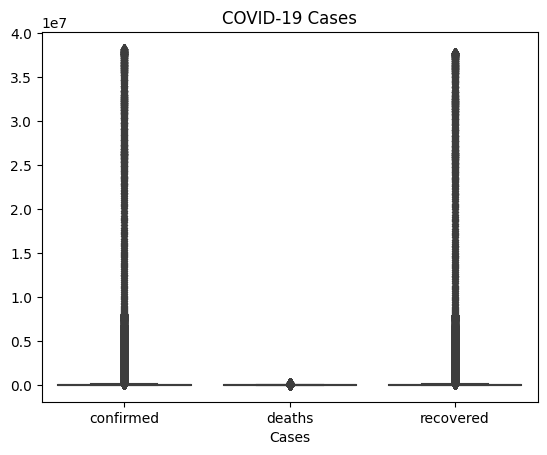

In [22]:
# Create boxplots for the cases data
sns.boxplot(data=df_cases[['confirmed', 'deaths', 'recovered']])
plt.title("COVID-19 Cases")
plt.xlabel("Cases")
plt.show()

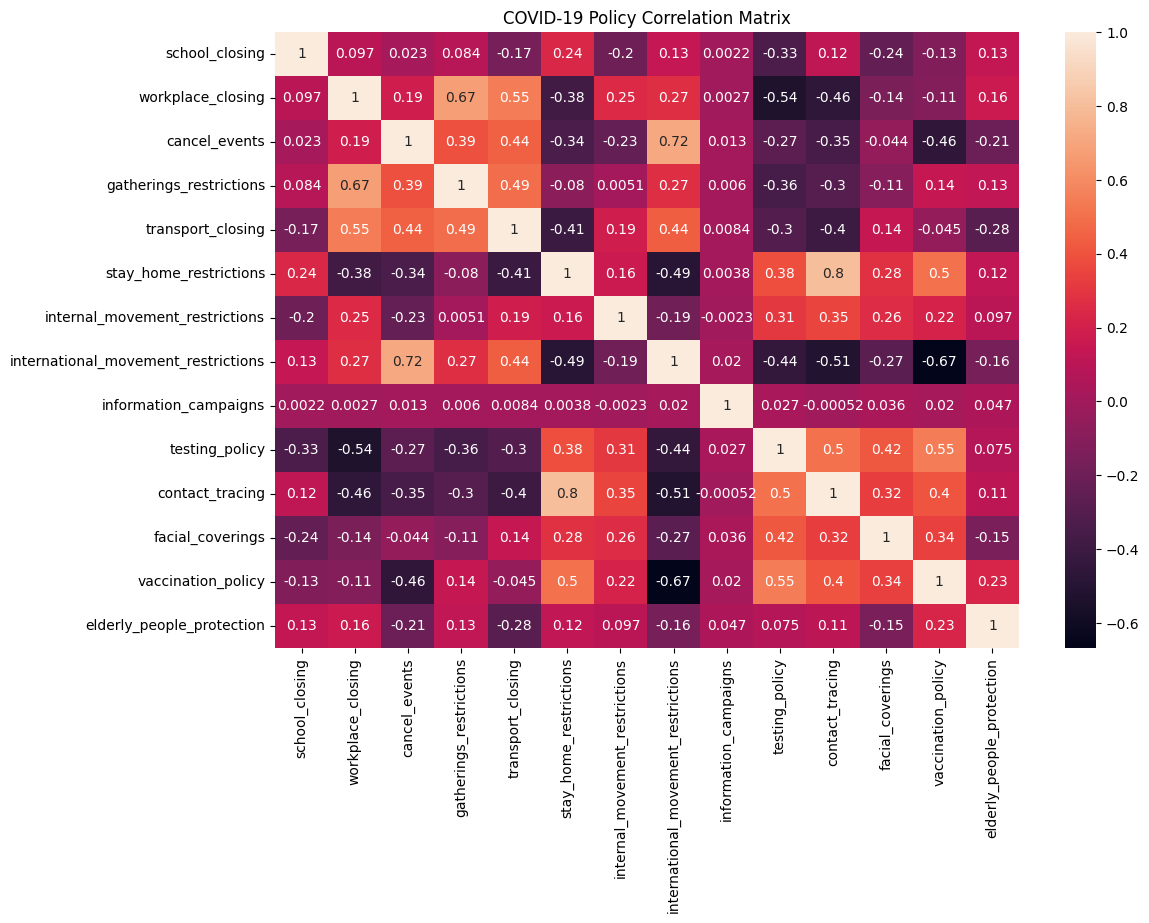

In [31]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df_policy.corr(numeric_only=True), annot=True, ax=ax)
plt.title("COVID-19 Policy Correlation Matrix")
plt.show()

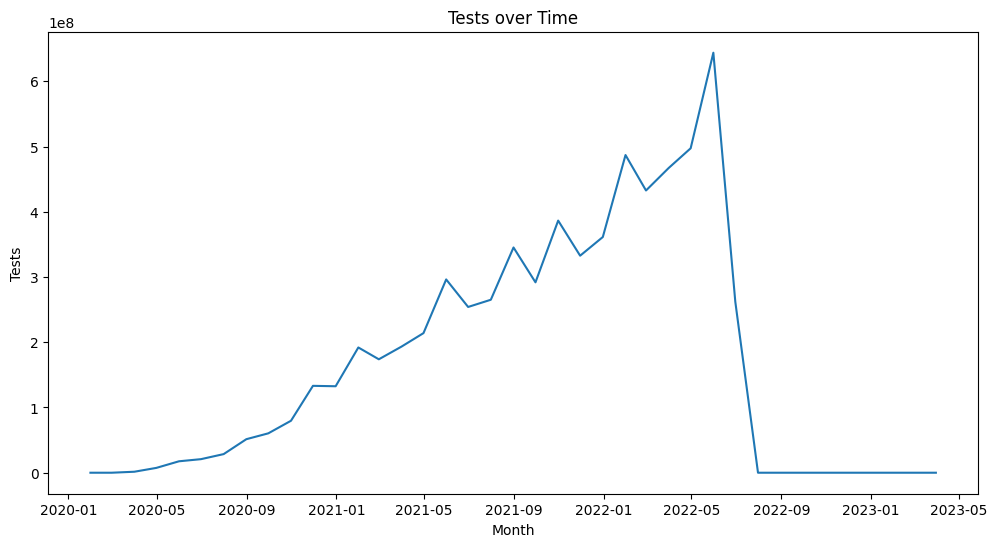

In [38]:
def create_monthly_lineplot(df, column_name):
    # Convert date column to datetime format
    df['date'] = pd.to_datetime(df['date'])

    # Group data by month and calculate sum of column
    monthly_data = df.groupby(pd.Grouper(key='date', freq='M'))[column_name].sum()

    # Create line plot
    plt.figure(figsize=(12,6))
    plt.plot(monthly_data.index, monthly_data.values)
    plt.xlabel('Month')
    plt.ylabel(column_name.capitalize())
    plt.title(f'{column_name.capitalize()} over Time')
    plt.show()

create_monthly_lineplot(df, 'tests')

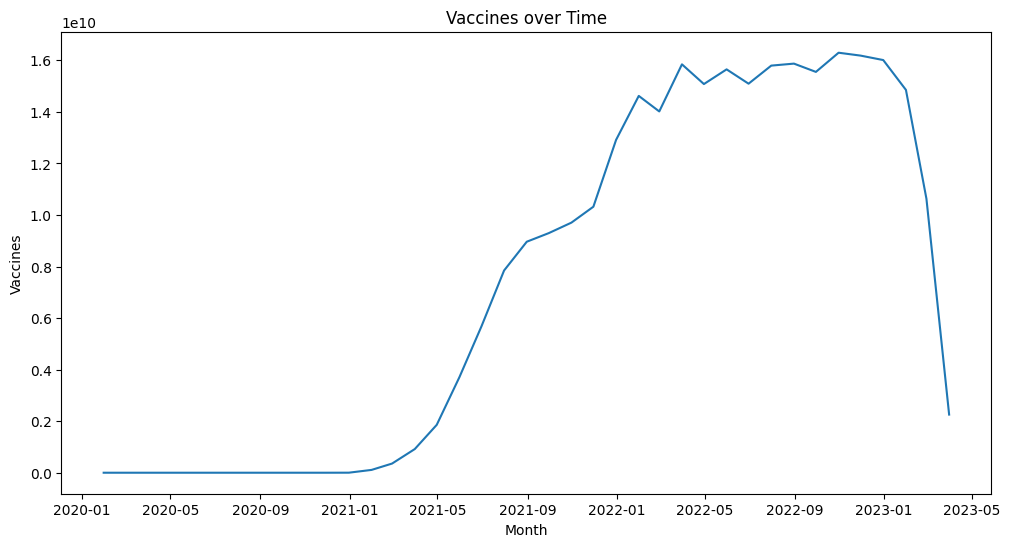

In [40]:
create_monthly_lineplot(df, 'vaccines')

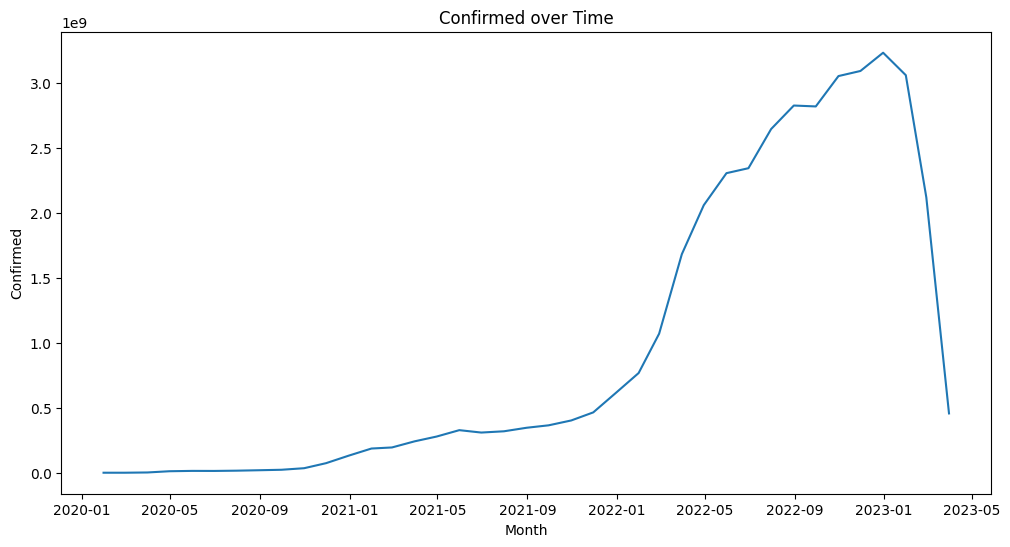

In [41]:
create_monthly_lineplot(df, 'confirmed')

In [46]:
df['school_closing'].unique()

array([ 0., -2., -3.,  3.,  2.,  1., nan])

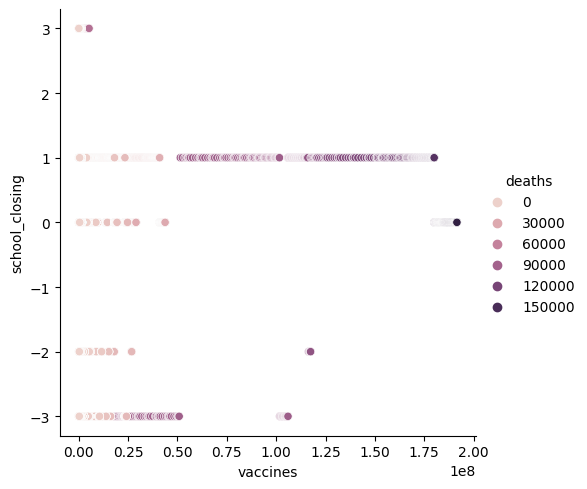

In [47]:
sns.relplot(x='vaccines', y='school_closing', hue='deaths', data=df)

<Axes: xlabel='deaths', ylabel='Count'>

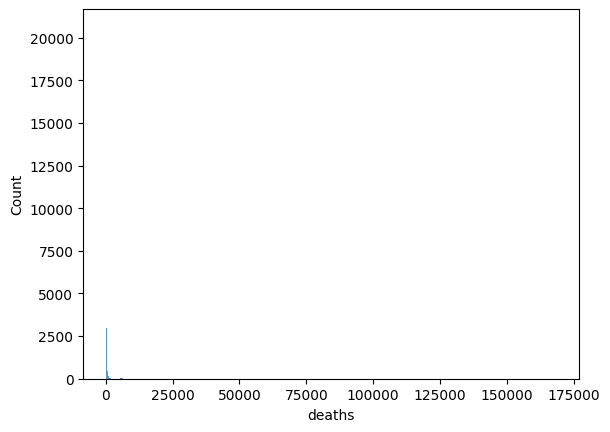

In [49]:
sns.histplot(df['deaths'])

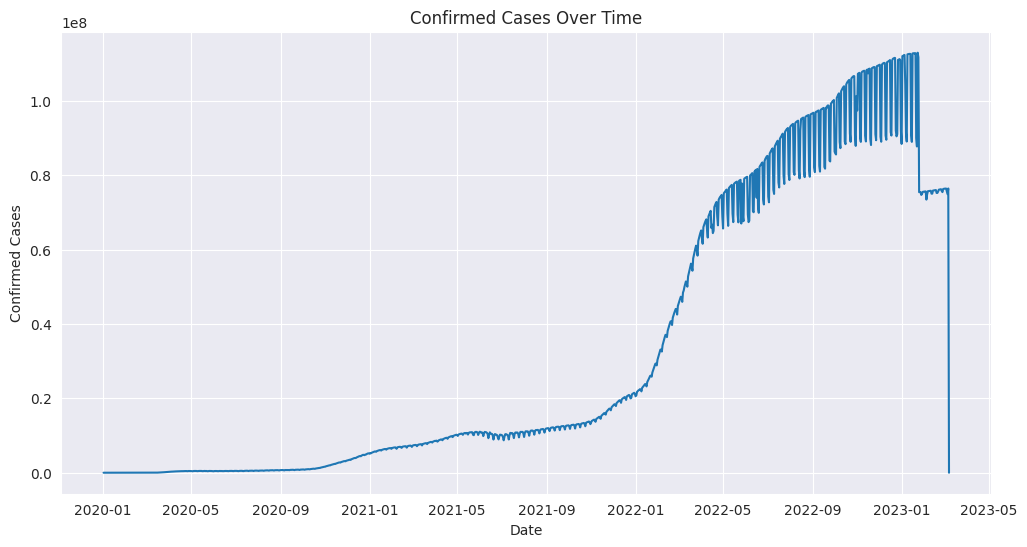

In [50]:
df['date'] = pd.to_datetime(df['date'])
date_df = df[['date', 'confirmed']]
date_df = df.groupby('date').sum(numeric_only=True).reset_index()

sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='confirmed', data=date_df)
plt.title('Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

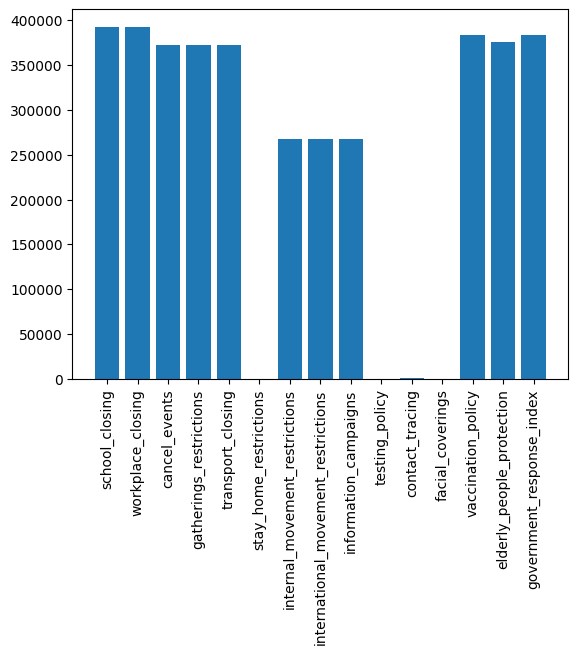

In [ ]:
# filter the data to only include the relevant columns
cols_to_plot = ['school_closing', 'workplace_closing', 'cancel_events', 'gatherings_restrictions', 'transport_closing', 'stay_home_restrictions', 'internal_movement_restrictions', 'international_movement_restrictions', 'information_campaigns', 'testing_policy', 'contact_tracing', 'facial_coverings', 'vaccination_policy', 'elderly_people_protection', 'government_response_index']
measures_filtered = measures[cols_to_plot]

# aggregate the data
measures_counts = measures_filtered.count()

# create a bar chart
plt.bar(measures_counts.index, measures_counts.values)
plt.xticks(rotation=90)
plt.show()

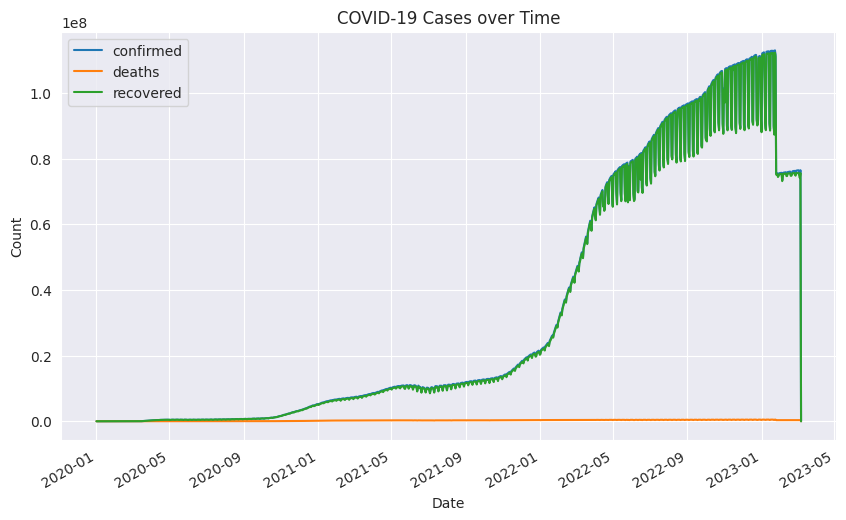

In [51]:
# Group data by date and calculate sum of confirmed cases, deaths, and recoveries
date_data = df.groupby('date')[['confirmed', 'deaths', 'recovered']].sum()

# Create line plot
date_data.plot(kind='line', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('COVID-19 Cases over Time')
plt.show()

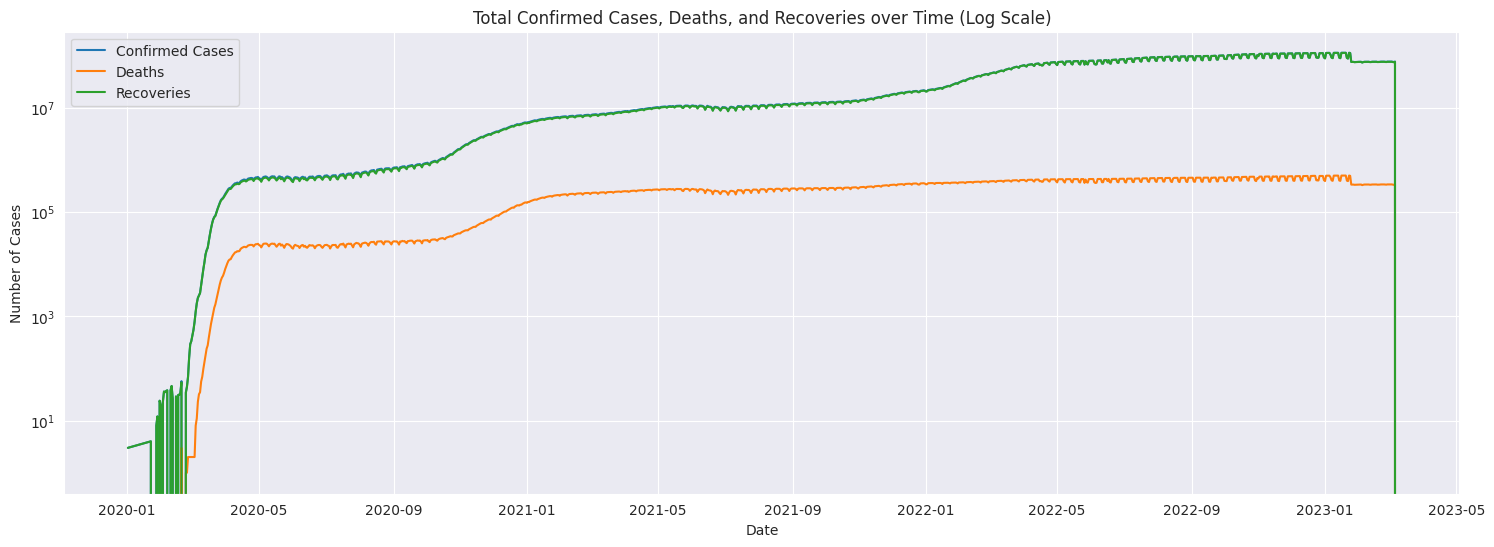

In [59]:
# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Group data by date and calculate sum of confirmed cases, deaths, and recoveries
daily_data = df.groupby('date')[['confirmed', 'deaths', 'recovered']].sum()

# Create line plot
plt.figure(figsize=(18, 6))
plt.plot(daily_data.index, daily_data['confirmed'], label='Confirmed Cases')
plt.plot(daily_data.index, daily_data['deaths'], label='Deaths')
plt.plot(daily_data.index, daily_data['recovered'], label='Recoveries')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Total Confirmed Cases, Deaths, and Recoveries over Time (Log Scale)')
plt.yscale('log')
plt.legend()
plt.show()

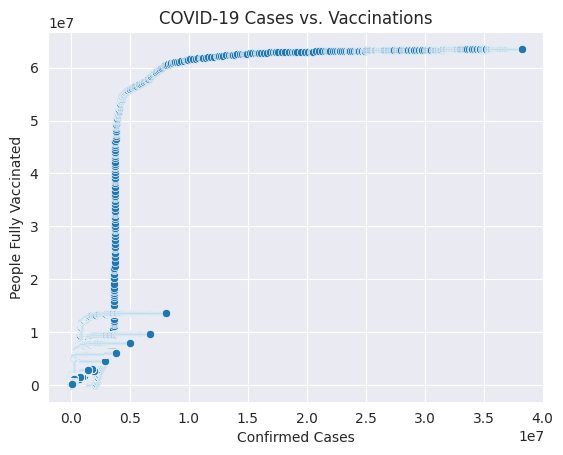

In [52]:
# Create scatterplot
sns.scatterplot(x='confirmed', y='people_fully_vaccinated', data=df)
plt.xlabel('Confirmed Cases')
plt.ylabel('People Fully Vaccinated')
plt.title('COVID-19 Cases vs. Vaccinations')
plt.show()

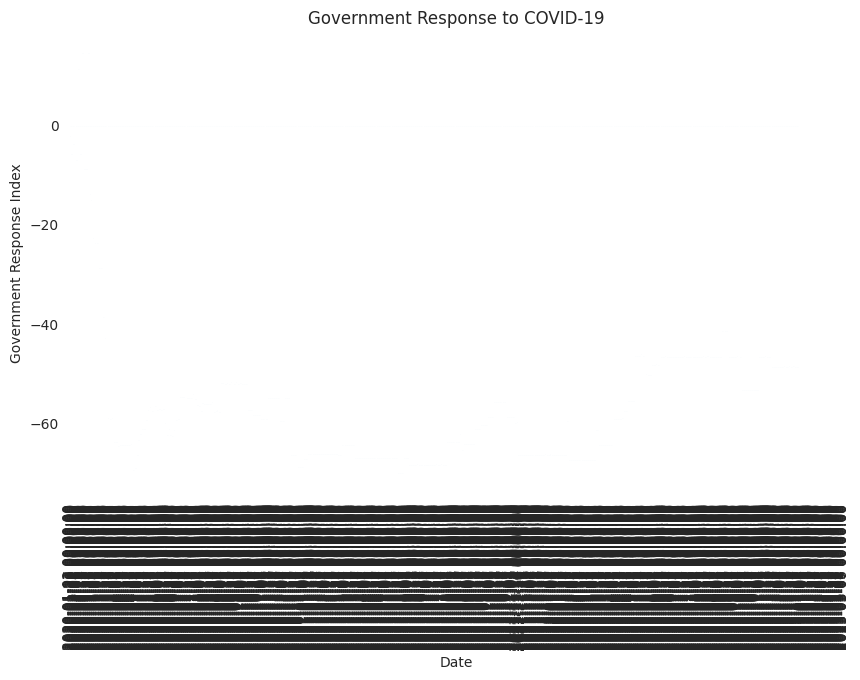

In [53]:
# Group data by date and calculate mean of government response index
date_data = df.groupby('date')['government_response_index'].mean()

# Create stacked bar chart
date_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Government Response Index')
plt.title('Government Response to COVID-19')
plt.show()

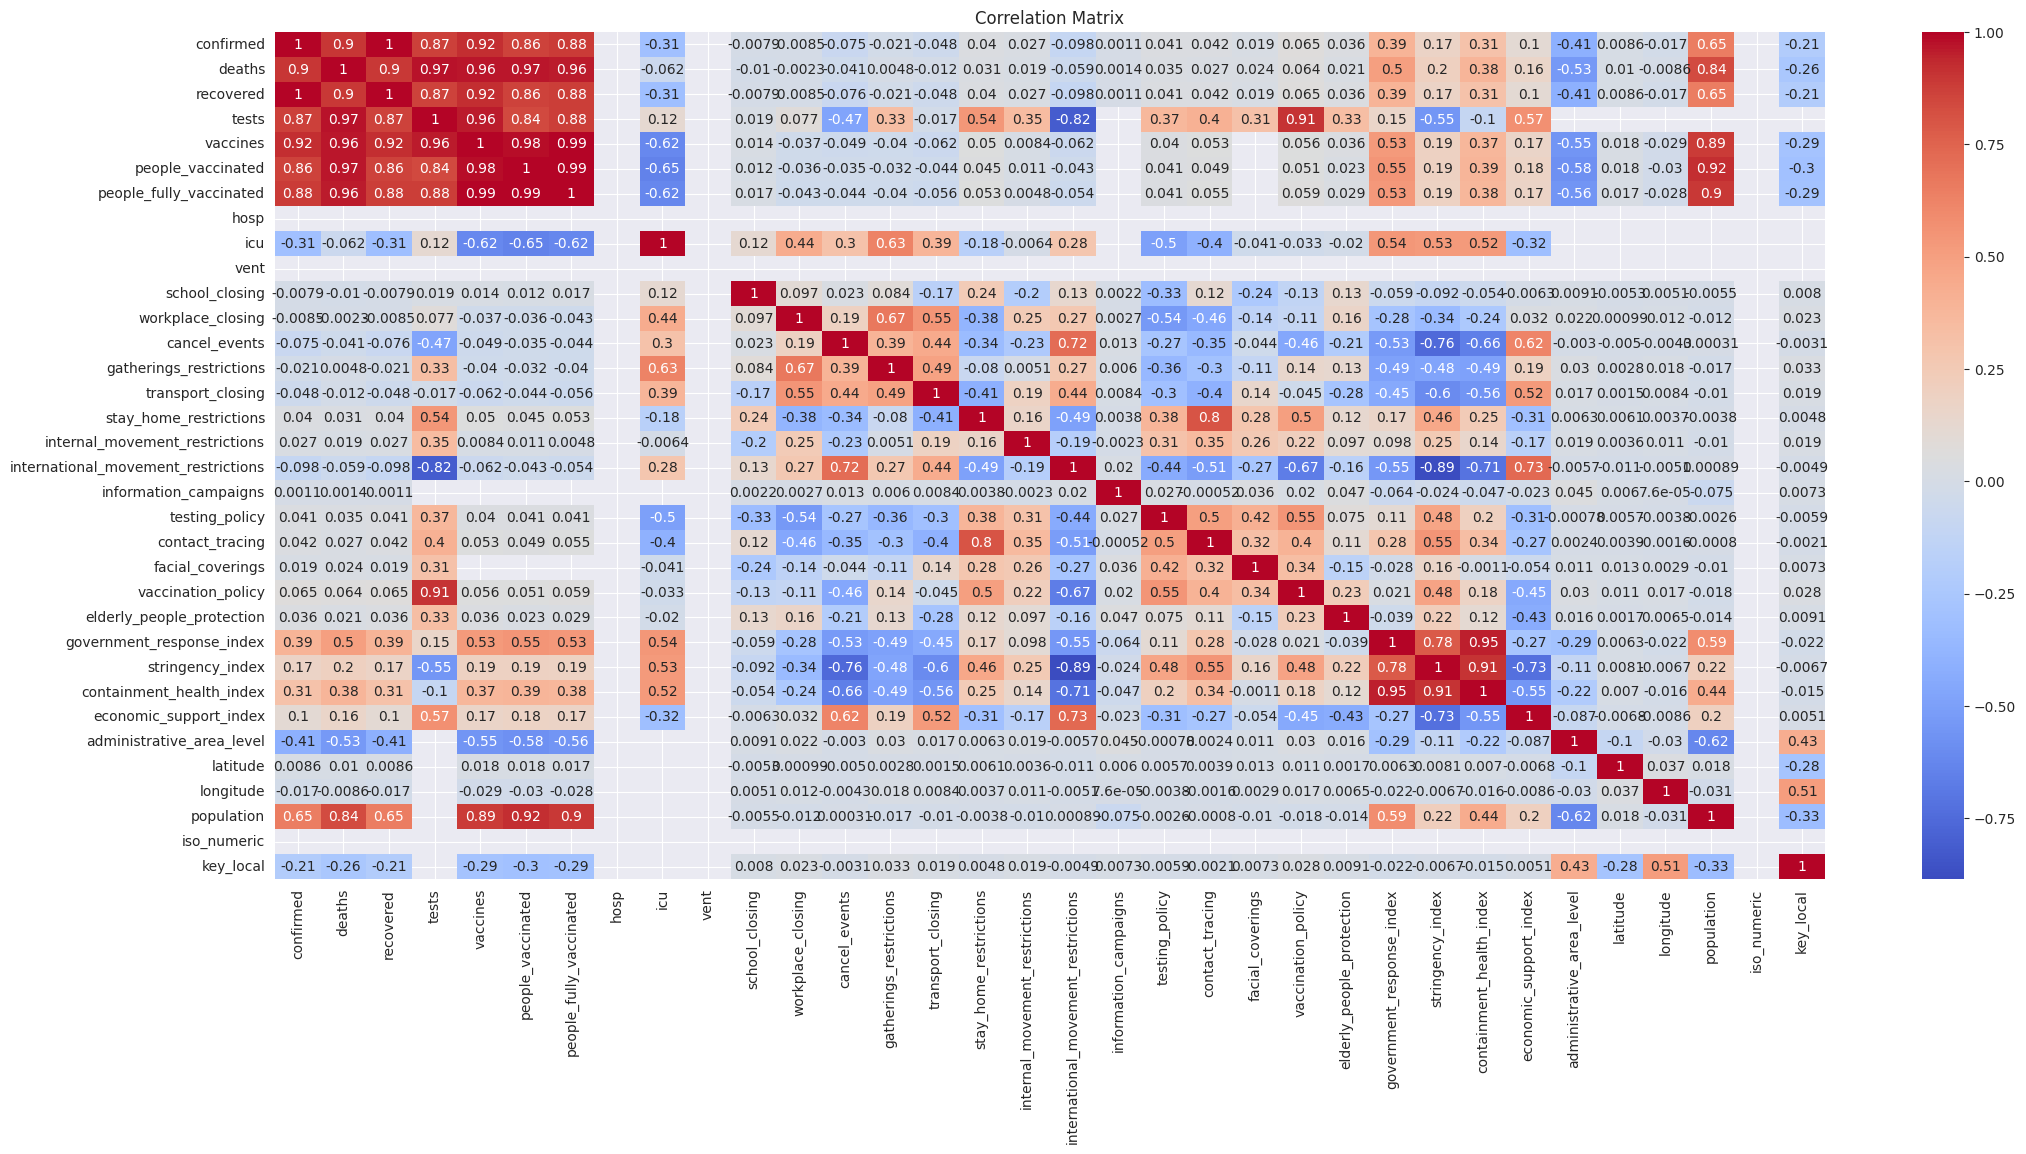

In [64]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

# Create correlation matrix
corr_matrix = numeric_cols.corr()

# Create heatmap
fig, ax = plt.subplots(figsize=(25, 11))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()